In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [179]:
# Artery Overlap
bp = "/media/lm/Samsung_T5/Uni/Medml/training/train"

mask_file = "A001_masks.nii.gz"
orig_file = "A001_orig.nii.gz"

mask = nib.load(bp + "/" + mask_file).get_fdata()
orig = nib.load(bp + "/" + orig_file).get_fdata()

vessel = (orig > np.percentile(orig, 99)).astype(int)
overlap_mask = (vessel * mask).astype(int)

min = 1
min_slice = -1
for slice_idx in range(mask.shape[2]):
    ratio = np.logical_and(mask[:, :, slice_idx], vessel[:, :, slice_idx]).sum() / mask[:, :, slice_idx].sum()

    if ratio < min:
        min = ratio
        min_slice = slice_idx

print(min, min_slice)

def mask_overlay(image, mask, color=(0., 1., 0.), weight=.5):
    """
    Helper function to visualize mask on the top of the aneurysm
    """
    image = np.dstack((image, image, image))
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = image * weight + mask * (1 - weight) # cv2.addWeighted(image, 1 - weight, mask, weight, 0.,  dtype=cv2.CV_32F)
    img = image.copy()
    ind = mask[:, :, 1] > 0
    img[ind] = weighted_sum[ind]
    return img

def normalize(image):
    """
    Helper function to normalize image
    """
    return (image - image.min()) / (image.max() - image.min())

x = 85
x_slice = slice(x, x + 64)
y_slice = slice(x, x + 64)

slice_idx = 91
overlay = mask_overlay(normalize(orig[x_slice, y_slice, slice_idx]), mask[x_slice , y_slice, slice_idx], weight=0.8)
overlay2 = mask_overlay(normalize(vessel[x_slice, y_slice, slice_idx]), mask[x_slice , y_slice, slice_idx], weight=0.8)
overlay3 = mask_overlay(normalize(orig[x_slice, y_slice, slice_idx]), overlap_mask[x_slice , y_slice, slice_idx], weight=0.8)
overlay4 = mask_overlay(normalize(vessel[x_slice, y_slice, slice_idx]), overlap_mask[x_slice , y_slice, slice_idx], weight=0.8)



0.0 89


/home/lm/anaconda3/envs/mlmed/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


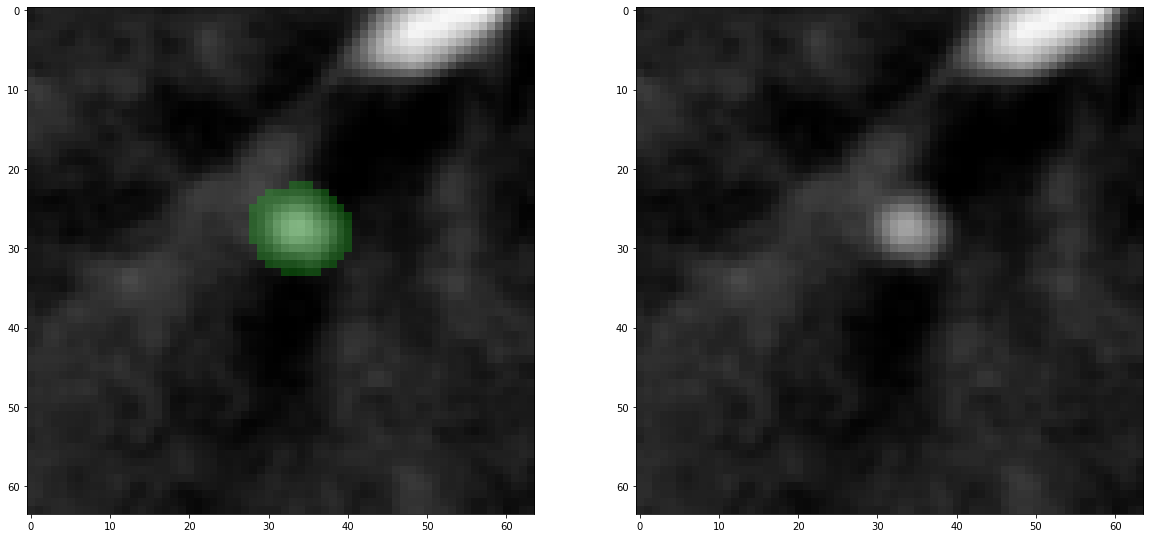

In [16]:
# First Image
f = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(overlay, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(orig[x_slice, y_slice, slice_idx], cmap="gray")
plt.savefig("./figures/artery_overlap_1.png")

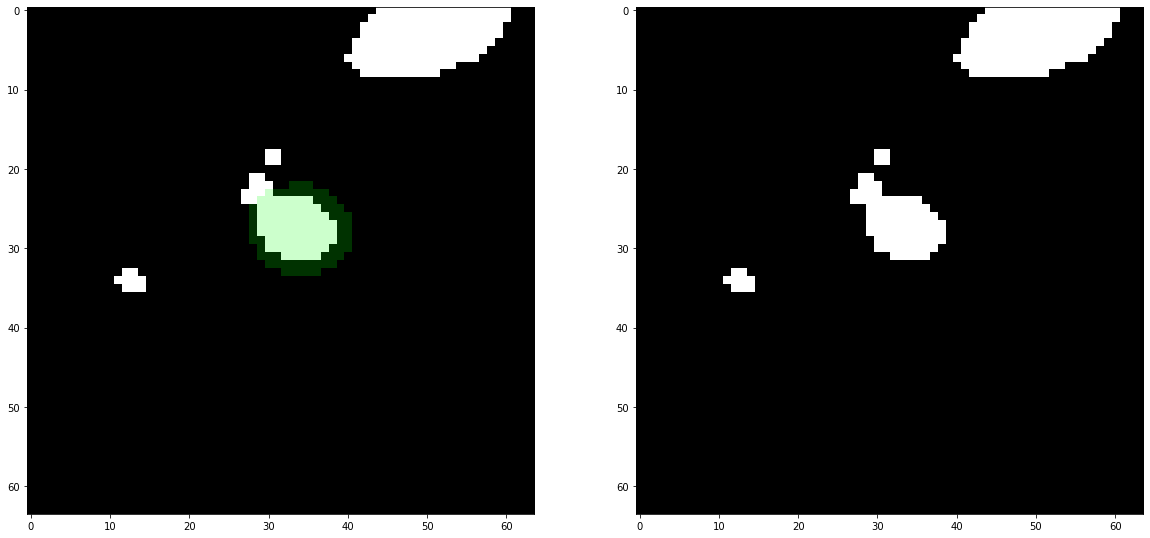

In [17]:
# Sec Image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(overlay2, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(vessel[x_slice, y_slice, slice_idx], cmap="gray")
plt.savefig("./figures/artery_overlap_2.png")

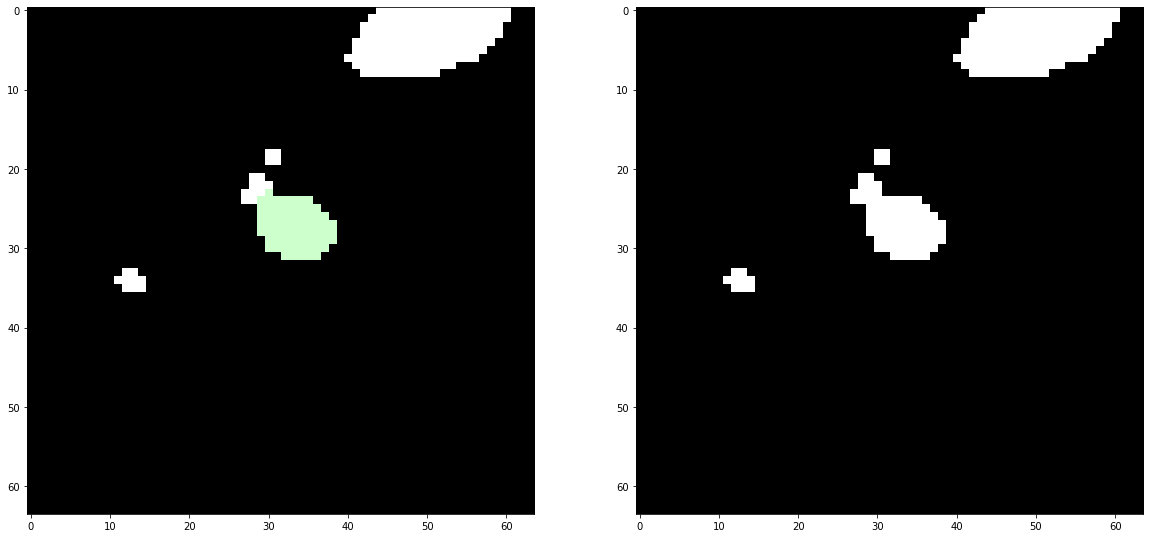

In [18]:
# Third Image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(overlay4, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(vessel[x_slice, y_slice, slice_idx], cmap="gray")
plt.savefig("./figures/artery_overlap_3.png")

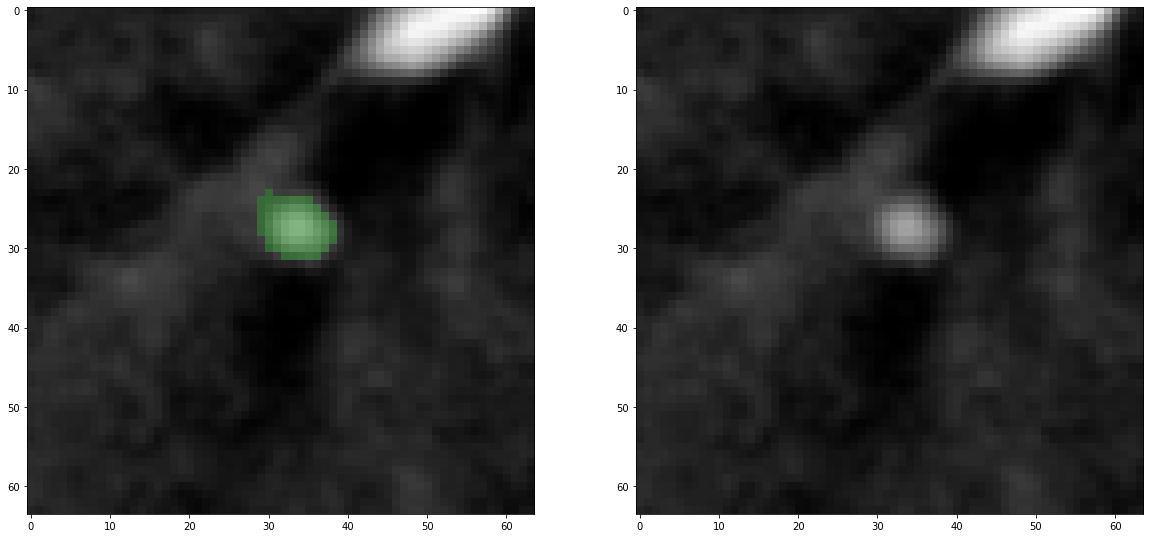

In [19]:
# Fourth Image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(overlay3, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(orig[x_slice, y_slice, slice_idx], cmap="gray")
plt.savefig("./figures/artery_overlap_4.png")

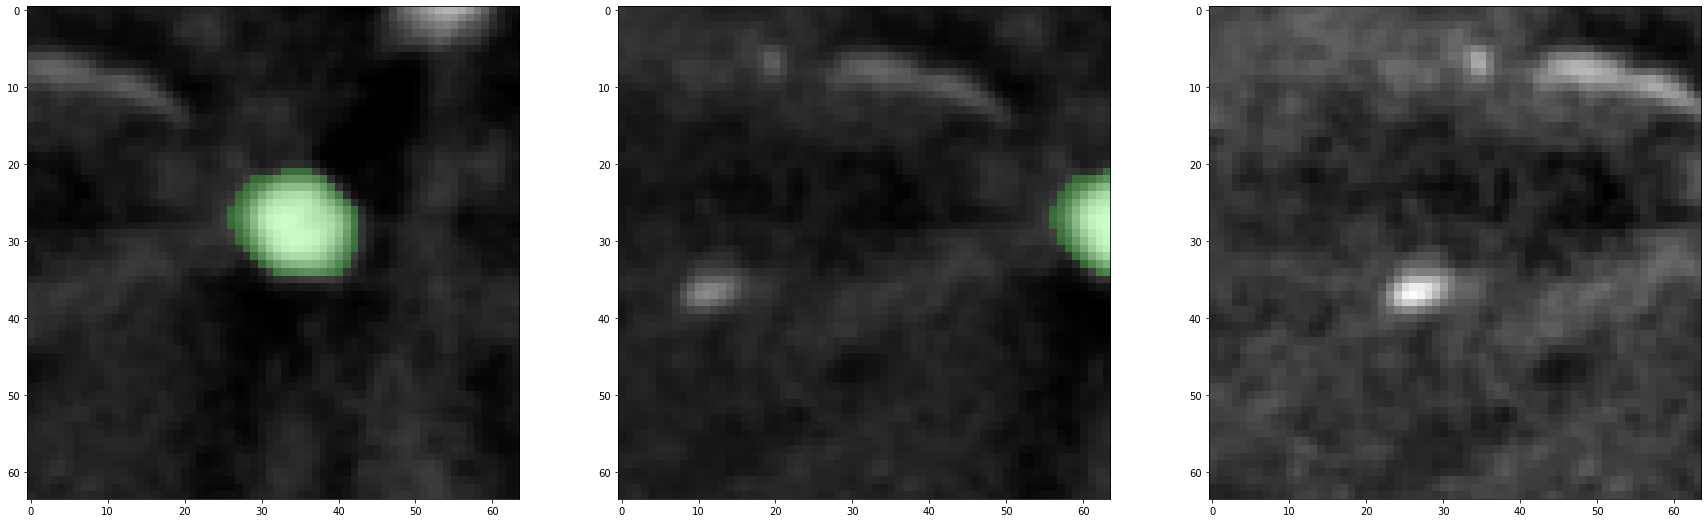

In [32]:
# Slice Filtering

# Full
x = 85
x_slice = slice(x, x + 64)
y_slice = slice(x, x + 64)

slice_idx = 94
overlay_full = mask_overlay(normalize(orig[x_slice, y_slice, slice_idx]), overlap_mask[x_slice , y_slice, slice_idx], weight=0.8)

# Cut off
x = 85
y = 55
x_slice = slice(x, x + 64)
y_slice = slice(y, y + 64)

slice_idx = 94
overlay_cutoff = mask_overlay(normalize(orig[x_slice, y_slice, slice_idx]), overlap_mask[x_slice , y_slice, slice_idx], weight=0.8)

# Empty
x = 85
y = 40
x_slice = slice(x, x + 64)
y_slice = slice(y, y + 64)

slice_idx = 94
overlay_empty = mask_overlay(normalize(orig[x_slice, y_slice, slice_idx]), overlap_mask[x_slice , y_slice, slice_idx], weight=0.8)

plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.imshow(overlay_full, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(overlay_cutoff, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(overlay_empty, cmap="gray")
plt.savefig("./figures/slice_filtering.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


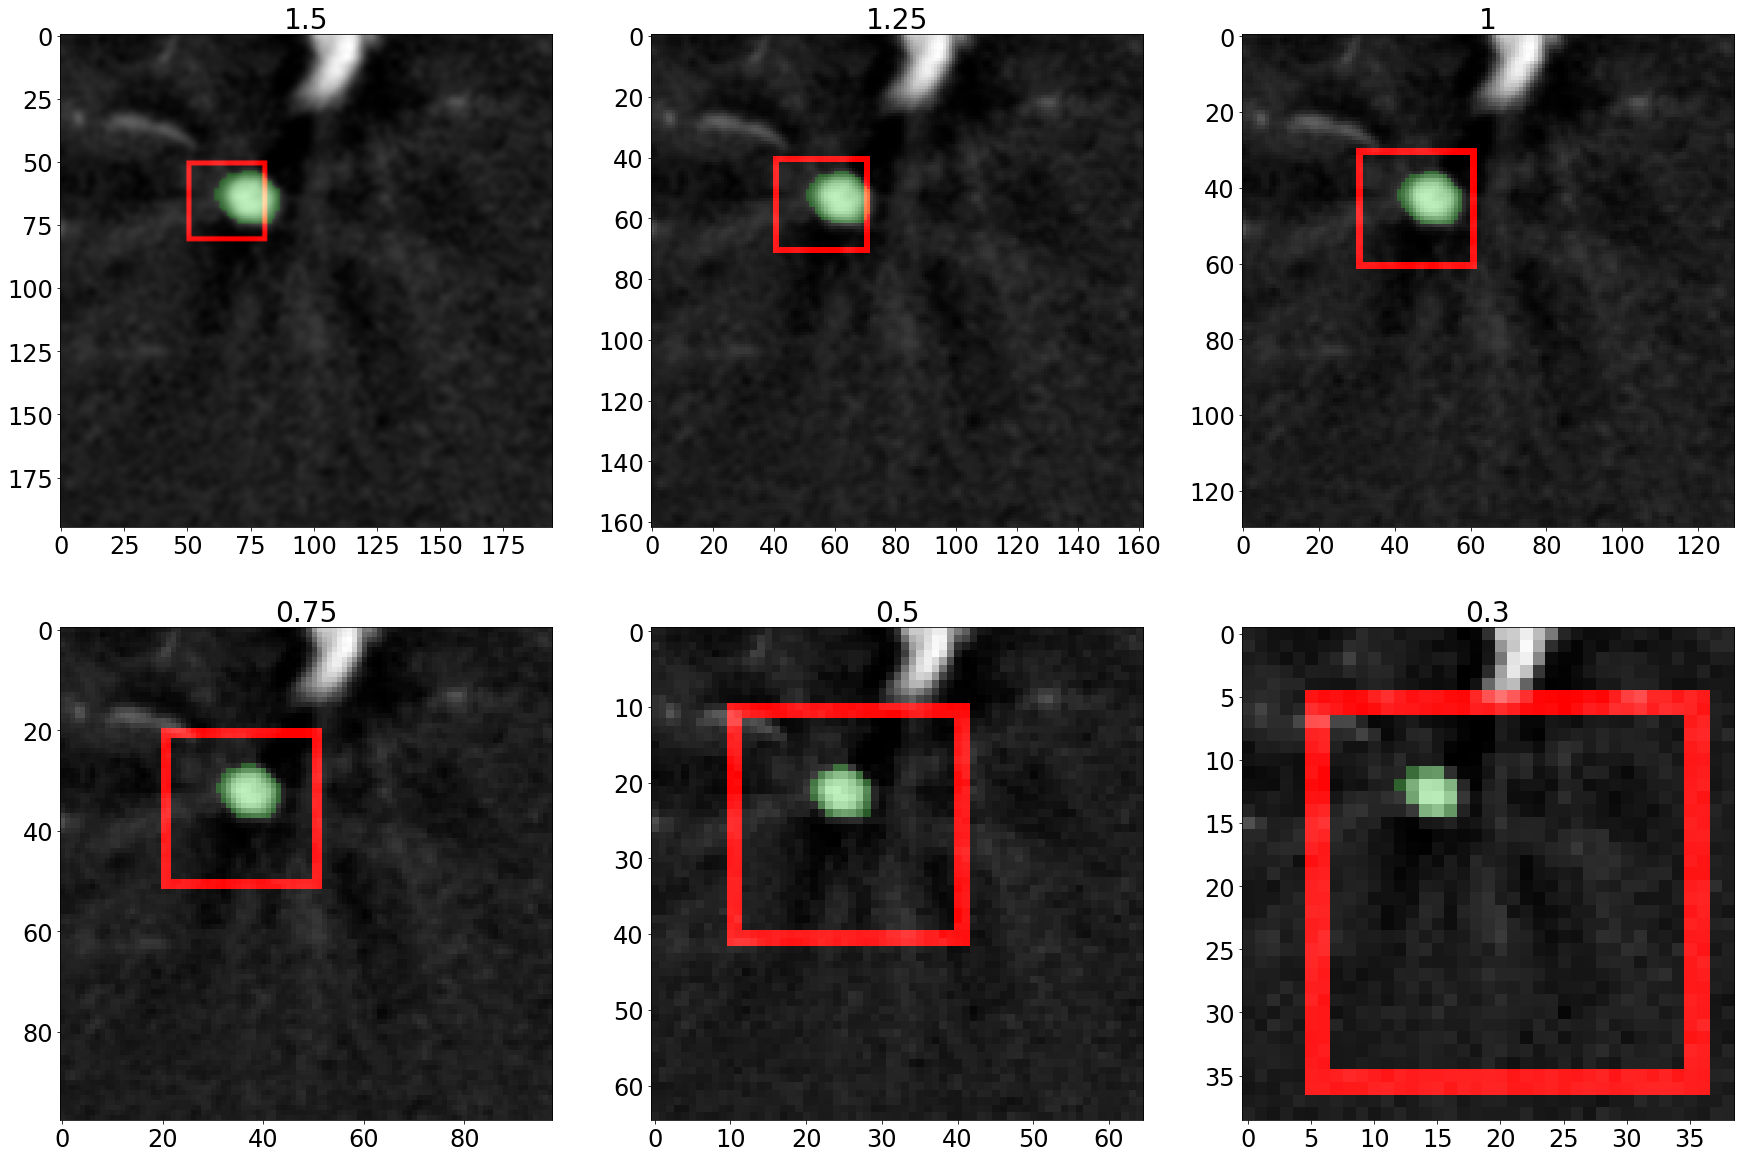

In [75]:
import scipy.ndimage as ndi
import tikzplotlib

def mask_overlay_2(image, mask, color=(0., 0., 1.), weight=.5):
    """
    Helper function to visualize mask on the top of the aneurysm
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = image * weight + mask * (1 - weight) # cv2.addWeighted(image, 1 - weight, mask, weight, 0.,  dtype=cv2.CV_32F)
    img = image.copy()
    ind = mask[:, :, 1] > 0
    img[ind] = weighted_sum[ind]
    return img

slice_idx = 94

s = slice(70, 200)

cur_image = normalize(orig[s, s, slice_idx])
cur_mask = overlap_mask[s, s, slice_idx]

plt.figure(figsize=(30, 20))
for idx, (fac, window_start) in enumerate(zip([1.5, 1.25, 1, 0.75, 0.5, 0.3], [50, 40, 30, 20, 10, 5])):
    plt.subplot(2, 3, idx + 1)
    plt.title(f"{fac}", fontsize=28)

    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    cur_image_resized = ndi.zoom(cur_image, fac, order=3)
    cur_mask_resized = ndi.zoom(cur_mask, fac, order=0)

    overlay = mask_overlay(cur_image_resized, cur_mask_resized, weight=0.8)

    window_slice = slice(window_start, window_start + 32)
    window_slice_inner = slice(window_start + 2, window_start + 32 - 2)
    window = np.zeros(cur_image_resized.shape + (3,))
    window[window_slice, window_slice, 0] = 1
    window[window_slice_inner, window_slice_inner, 0] = 0

    overlay2 = overlay + window
    plt.imshow(overlay2)

plt.savefig("./figures/zooming.png")






0.7855166 0.0030723407 1.0
47


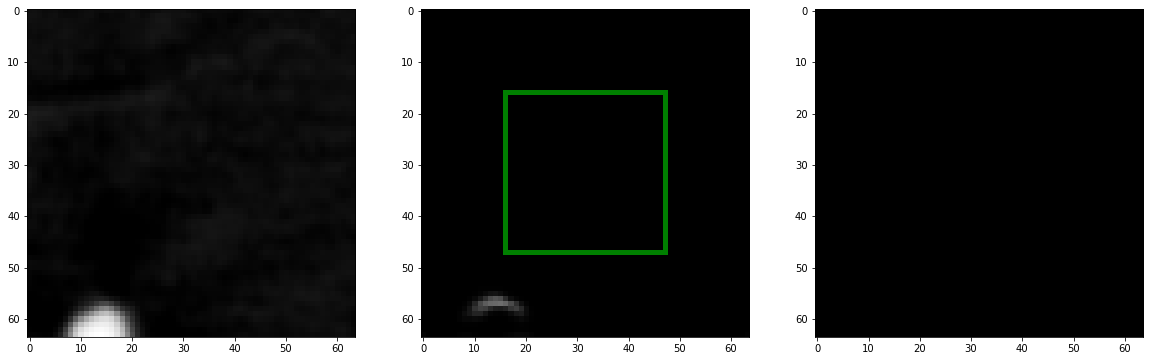

In [220]:
import os
import nibabel as nib
import h5py
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir("/media/lm/Samsung_T5/Uni/Medml/presentation_test/out2")
files = sorted(files)

i = 1

with h5py.File(f"/media/lm/Samsung_T5/Uni/Medml/presentation_test/out2/{files[i]}", "r") as f:
    pred = f["data"][:]
    pred_weighted = f["weighted"][:]
    weight = f["weight"][:]
    orig = f["orig"][:].squeeze()


    print(pred.max(), pred_weighted.max(), weight.max())

    max_slice = np.argmax(pred_weighted.sum(axis=(0,1)))

    border = np.copy(weight)
    border[17:64-17:, 17:64-17, :] = 0


    print(max_slice)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(orig[:, :, max_slice], cmap="gray")
    plt.subplot(1, 3, 2)
    plt.imshow(mask_overlay(pred[:, :, max_slice], border[:, :, max_slice]), cmap="gray")
    plt.subplot(1, 3, 3)
    plt.imshow(np.zeros_like(pred[:, :, max_slice]), cmap="gray")
    plt.savefig("./figures/pred_weighted_not.png")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


A047.h5
loaded
A127.h5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loaded


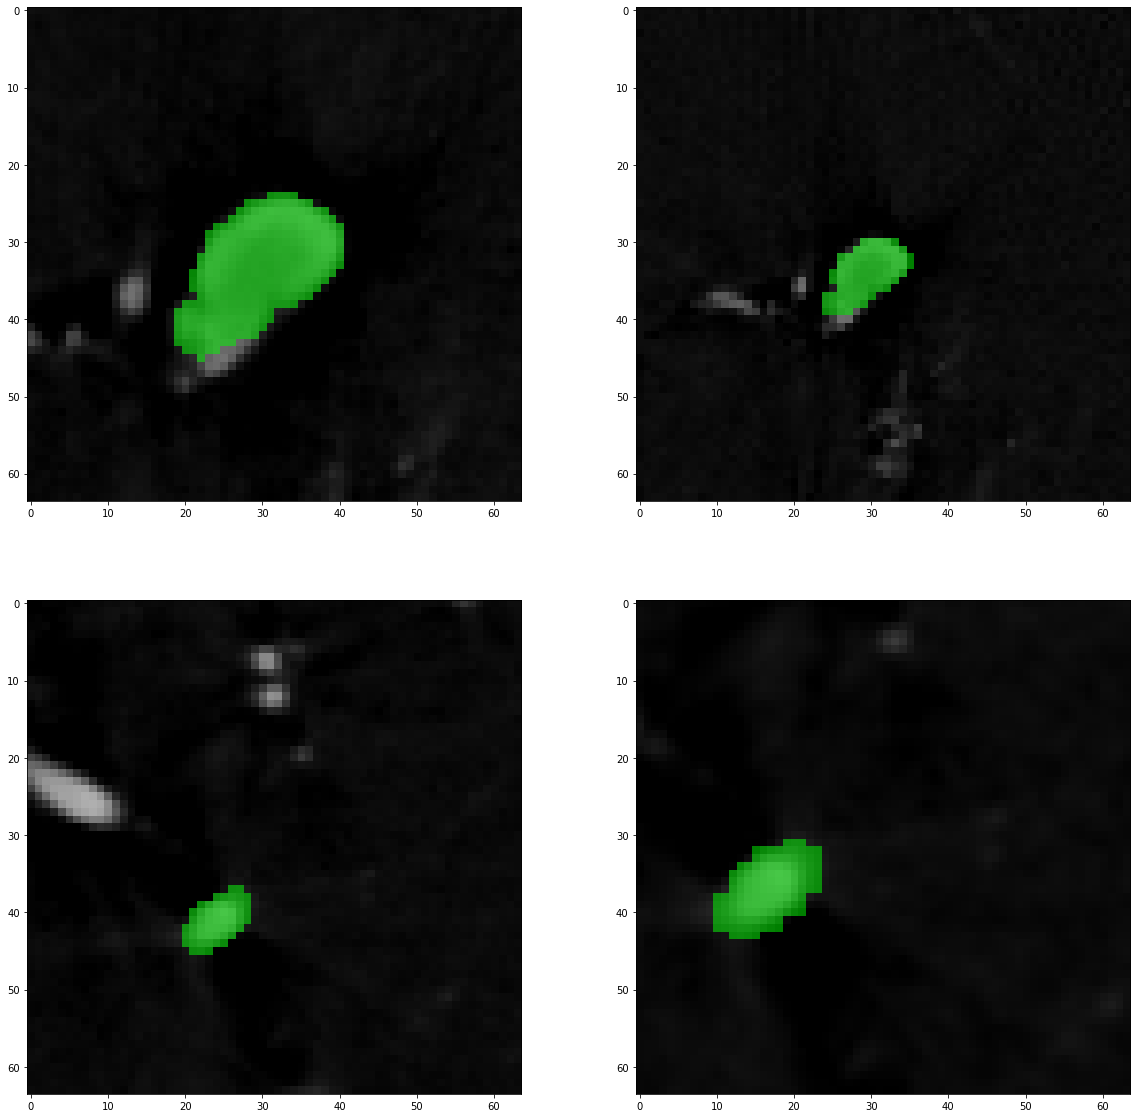

In [239]:
# Zooming

normal_bp = "/media/lm/Samsung_T5/Uni/Medml/training/val/h5"
adjuste_bp = "/media/lm/Samsung_T5/Uni/Medml/training/val/h5_size_adjusted"

example_0_5 = "A047.h5"
example_1_5 = "A127.h5"

plt.figure(figsize=(20, 20))
for idx, (name, fac, s_orig, s_resc) in enumerate([(example_0_5, 0.5, (65, 65), (15, 18)), (example_1_5, 1.5, (130, 120), (220, 200))]):
    with h5py.File(os.path.join(normal_bp, name), "r") as f_orig:
        with h5py.File(os.path.join(adjuste_bp, name), "r") as f_rescaled:
            print(name)
            normal_raw = f_orig["raw"][:]
            rescaled_raw = f_rescaled["raw"][:]

            normal_mask = f_orig["overlap_mask"][:]
            rescaled_mask = f_rescaled["overlap_mask"][:]
            print("loaded")

            x_slice_orig = slice(s_orig[0], s_orig[0] + 64)
            y_slice_orig = slice(s_orig[1], s_orig[1] + 64)

            x_slice_resc = slice(s_resc[0], s_resc[0] + 64)
            y_slice_resc = slice(s_resc[1], s_resc[1] + 64)

            max_slice_norm = np.argmax(normal_mask.sum(axis=(0,1)))
            max_slice_resc = np.argmax(rescaled_mask.sum(axis=(0,1)))

            plt.subplot(2, 2, idx * 2 + 1)
            plt.imshow(mask_overlay(normal_raw[x_slice_orig, y_slice_orig, max_slice_norm], normal_mask[x_slice_orig, y_slice_orig, max_slice_norm]))
            # plt.imshow(mask_overlay(normal_raw[:, :, max_slice_norm], normal_mask[:, :, max_slice_norm]))
            plt.subplot(2, 2, idx * 2 + 2)
            plt.imshow(mask_overlay(rescaled_raw[x_slice_resc, y_slice_resc, max_slice_resc], rescaled_mask[x_slice_resc, y_slice_resc, max_slice_resc]))
            # plt.imshow(mask_overlay(rescaled_raw[:, :, max_slice_resc], rescaled_mask[:, :, max_slice_resc]))

plt.savefig("./figures/zooming_train.png")